## Setup

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly.express as px
import numpy as np 

## Workflow introduction

**1.Visualize the Data**  

Plot the time series to visually inspect the trend and seasonality.
Use tools like the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to identify patterns.


**2.Assess Stationarity**

Perform statistical tests like the Augmented Dickey-Fuller (ADF) test to check for stationarity.


**3.First Differencing (Remove Trend)**

If a strong trend is present, apply first differencing to remove the trend component.
Inspect the differenced series to see if the trend has been sufficiently removed.

**4.Seasonal Differencing (Remove Seasonality)**

If minor seasonality is present, apply seasonal differencing after first differencing to remove seasonal effects.
The seasonal period should be chosen based on the frequency of the data (e.g., 365 for monthly data with yearly seasonality). If there's visible weekly seasonality, apply seasonal differencing with a lag of 5 (assuming 5 trading days in a week).

**5.Evaluate Residuals**

After differencing, evaluate the residuals to ensure they are stationary.
Use ACF and PACF plots to examine residuals for any remaining patterns.

## Workflow introduction

In [2]:
apple = pd.read_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\OLS_df.csv', index_col=0)
apple = apple[apple.index >= '2010-01-01']
apple.head()

,Adj Close,Volume,Return,Return_tomo
2010-01-01,6.362937,352410800.0,0.000000,0.000000
2010-01-02,6.362937,352410800.0,0.000000,0.000000
2010-01-03,6.362937,352410800.0,0.000000,0.015565
2010-01-04,6.461977,493729600.0,0.015565,0.001729
2010-01-05,6.473148,601904800.0,0.001729,-0.015906


In [3]:
# plot the interactive plot 

figure = px.line(apple, x = apple.index, y= "Return")
figure.update_layout(yaxis_title = "Return",  title = "Daily return of Apple stock from 2010 to 2024")
figure.update_xaxes(rangeslider_visible = True)
figure.show()

To employ the arima model, we use the acf and pacf plots to identify the q and p parameters.

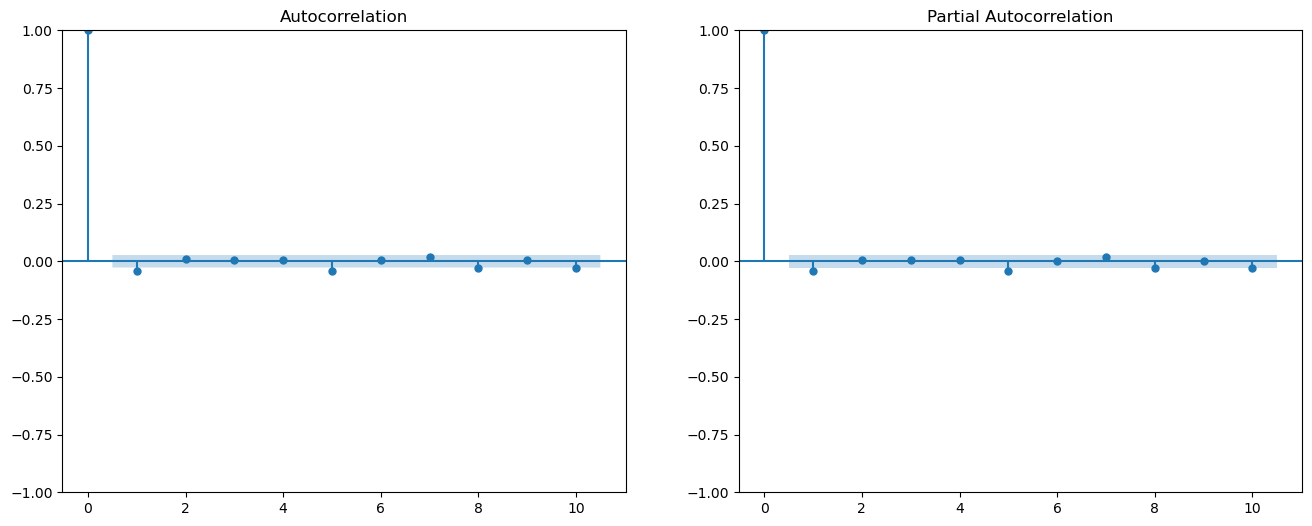

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(apple['Return'].dropna(), lags=10, ax=axes[0])
plot_pacf(apple['Return'].dropna(), lags=10, ax=axes[1])
plt.show()

In [8]:
train_set = apple.iloc[:int(0.98*len(apple['Return'])),:]
test_set = apple.iloc[int(0.98*len(apple['Return'])):, :]

train = train_set['Return']
test = test_set['Return']

test.shape

(106,)

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(train, order=(1, 0, 0))
model1_fit = model1.fit()
print(model1_fit.summary())

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 5150
Model:                 ARIMA(1, 0, 0)   Log Likelihood               14419.061
Date:                Mon, 17 Jun 2024   AIC                         -28832.123
Time:                        18:46:31   BIC                         -28812.483
Sample:                    01-01-2010   HQIC                        -28825.249
                         - 02-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.850      0.000       0.000       0.001
ar.L1         -0.0432      0.009     -4.577      0.000      -0.062      -0.025
sigma2         0.0002   1.89e-06    114.541      0.0

In [10]:
# Make predictions and evaluate this stats model 
predictions = model1_fit.forecast(steps=len(test))
# Calculate the errors
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00014477369649391683


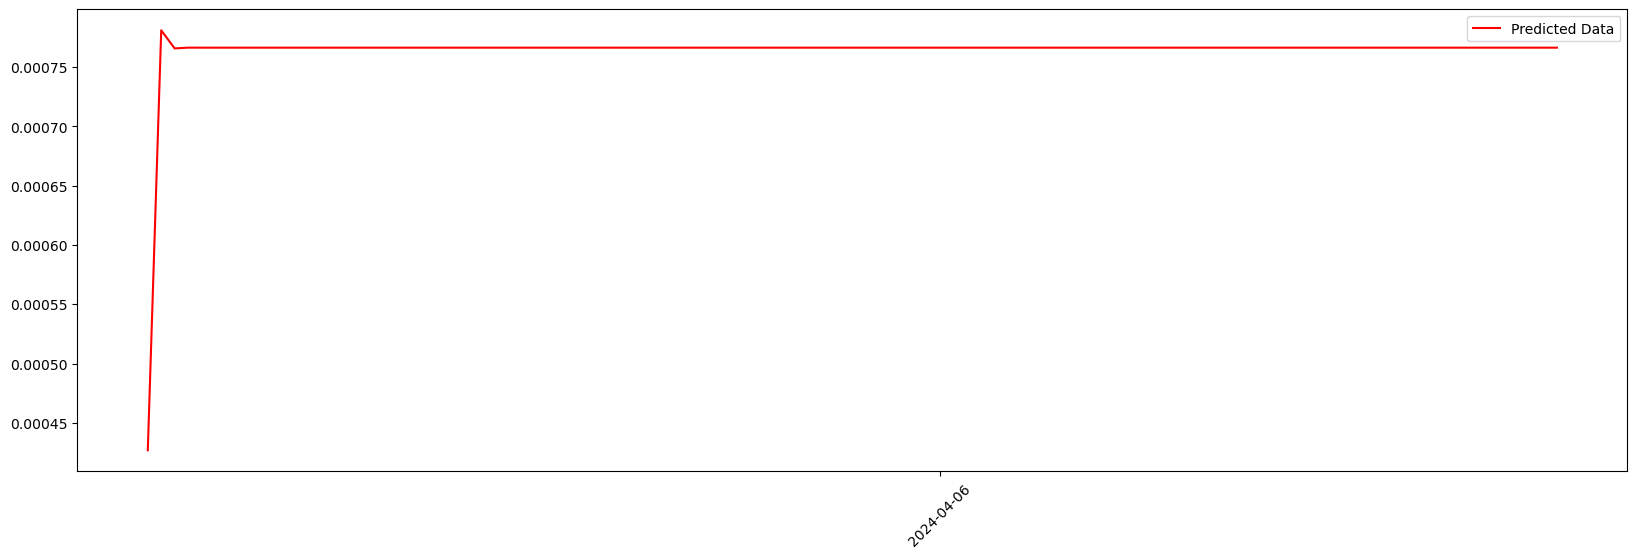

In [11]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 6))
plt.plot(test.index, predictions, label='Predicted Data', color='red')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
plt.xticks(rotation=45)
plt.show()

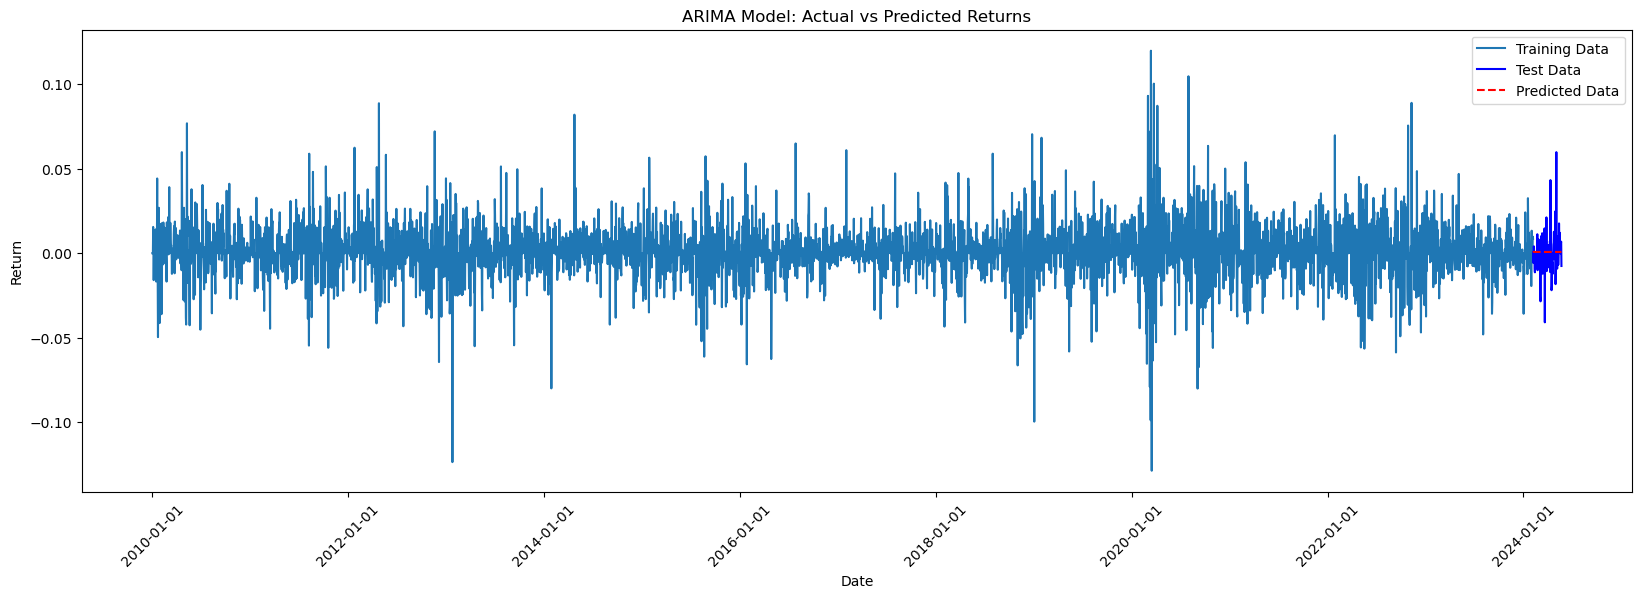

In [12]:
# Plot data
plt.figure(figsize=(20, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='blue')
plt.plot(test.index, predictions, label='Predicted Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()

# Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.show()

## Multistep forecasting


In [61]:
# Build and train the ARIMA model

model = ARIMA(train, order=(1, 1, 1))  # Specify the order (p, d, q)
model_fit = model.fit()
print(model_fit.summary())


test_df = pd.DataFrame(data=test.values, columns=['test real'], index = test.index)
test_df['predicted(ri-ri-1)'] = model_fit.forecast(len(test))
test_df['predicted(ri'] = test_df['predicted(ri-ri-1)'] +test_df['test real'].shift(1)



plt.figure(figsize=(20, 6))
plt.plot(test_df.index, test_df['test real'], label='Test Data', color='blue')
plt.plot(test_df.index, test_df['predicted(ri'].shift(-1), label='Predicted Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()

# Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.show()

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 5150
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14410.411
Date:                Mon, 17 Jun 2024   AIC                         -28814.821
Time:                        19:32:50   BIC                         -28795.182
Sample:                    01-01-2010   HQIC                        -28807.948
                         - 02-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0432      0.009     -4.616      0.000      -0.062      -0.025
ma.L1         -1.0000      0.075    -13.421      0.000      -1.146      -0.854
sigma2         0.0002    1.6e-05     13.489      0.0

<Axes: >

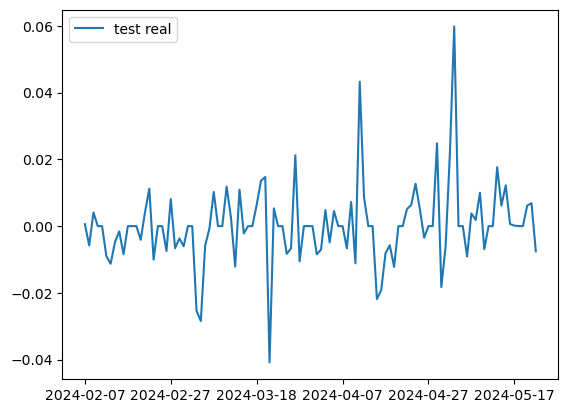

In [62]:
test_df = pd.DataFrame(data=test.values, columns=['test real'], index = test.index)
test_df['predicted(ri-ri-1)'] = model_fit.forecast(len(test))
test_df['predicted(ri'] = test_df['predicted(ri-ri-1)'] +test_df['test real'].shift(1)

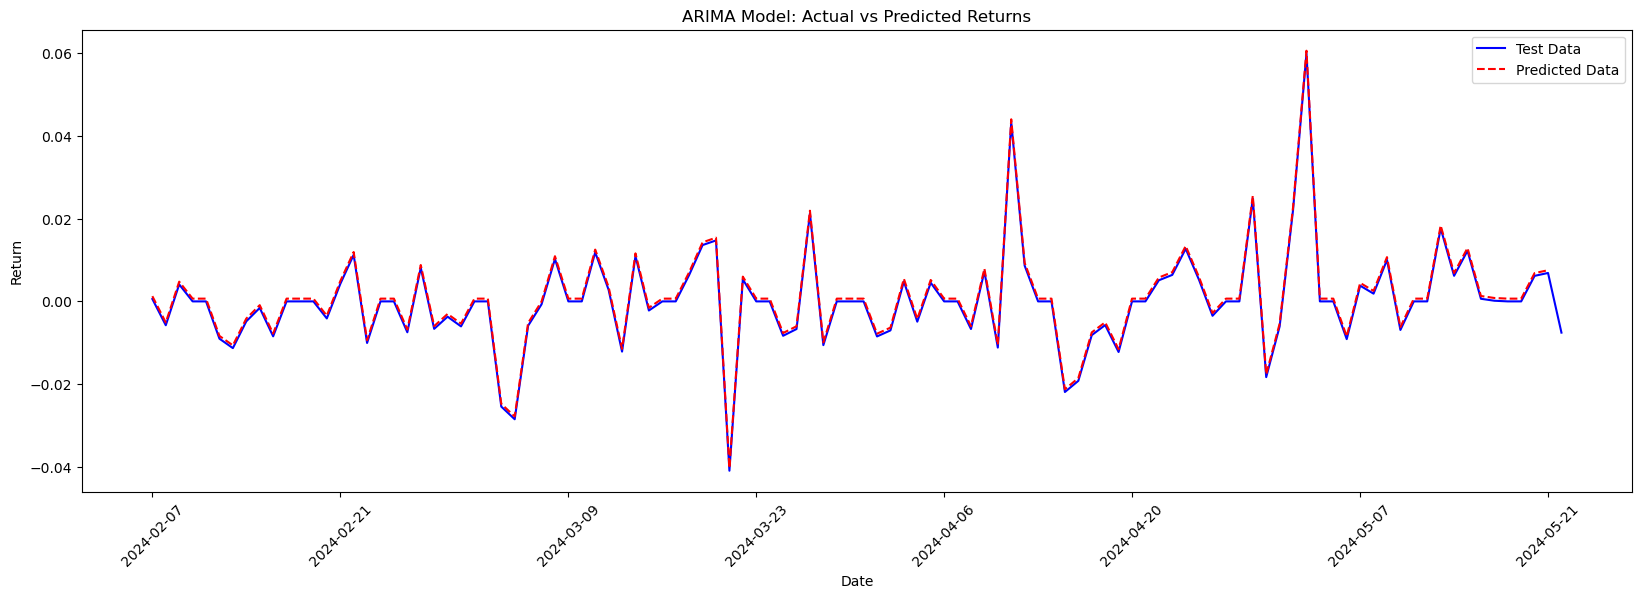

In [65]:
plt.figure(figsize=(20, 6))
plt.plot(test_df.index, test_df['test real'], label='Test Data', color='blue')
plt.plot(test_df.index, test_df['predicted(ri'].shift(-1), label='Predicted Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()

# Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.show()

In [16]:
history = [x for x in train] # Make the history as a list 
predictions = list()      # Make the prediction also as a list 

for t in range(len(test)):      # for every new point, we make a decision based on the available history 
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'finish {t} round, {len(test_set)-t} left')

finish 0 round, 106 left
finish 1 round, 105 left
finish 2 round, 104 left
finish 3 round, 103 left
finish 4 round, 102 left
finish 5 round, 101 left
finish 6 round, 100 left
finish 7 round, 99 left
finish 8 round, 98 left
finish 9 round, 97 left
finish 10 round, 96 left
finish 11 round, 95 left
finish 12 round, 94 left
finish 13 round, 93 left
finish 14 round, 92 left
finish 15 round, 91 left
finish 16 round, 90 left
finish 17 round, 89 left
finish 18 round, 88 left
finish 19 round, 87 left
finish 20 round, 86 left
finish 21 round, 85 left
finish 22 round, 84 left
finish 23 round, 83 left
finish 24 round, 82 left
finish 25 round, 81 left
finish 26 round, 80 left
finish 27 round, 79 left
finish 28 round, 78 left
finish 29 round, 77 left
finish 30 round, 76 left
finish 31 round, 75 left
finish 32 round, 74 left
finish 33 round, 73 left
finish 34 round, 72 left
finish 35 round, 71 left
finish 36 round, 70 left
finish 37 round, 69 left
finish 38 round, 68 left
finish 39 round, 67 left
fin

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



finish 79 round, 27 left
finish 80 round, 26 left
finish 81 round, 25 left
finish 82 round, 24 left
finish 83 round, 23 left
finish 84 round, 22 left
finish 85 round, 21 left
finish 86 round, 20 left
finish 87 round, 19 left
finish 88 round, 18 left
finish 89 round, 17 left


c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



finish 90 round, 16 left
finish 91 round, 15 left
finish 92 round, 14 left
finish 93 round, 13 left
finish 94 round, 12 left
finish 95 round, 11 left
finish 96 round, 10 left
finish 97 round, 9 left
finish 98 round, 8 left
finish 99 round, 7 left
finish 100 round, 6 left
finish 101 round, 5 left
finish 102 round, 4 left
finish 103 round, 3 left
finish 104 round, 2 left
finish 105 round, 1 left


In [25]:
predictions

[0.0004268159712301154,
 0.0007744623761233927,
 0.0010467594307957578,
 0.0006220550088328648,
 0.0007987731862337082,
 0.000798617719066261,
 0.001185496911705214,
 0.0012799175870314952,
 0.000999872888462858,
 0.0008601900450762647,
 0.0011530172147582024,
 0.0007904269205069991,
 0.0007902732932051424,
 0.0007901197260799975,
 0.0009659334995908665,
 0.0006098742875247444,
 0.0003089087300590274,
 0.0012218469486159219,
 0.0007896613773115641,
 0.0007895081065290667,
 0.001108529379574048,
 0.0004397331376006483,
 0.001073709931847342,
 0.0009461804013676297,
 0.0010453732936945345,
 0.0007854507310791214,
 0.0007852984870712051,
 0.001872727051056196,
 0.001977909961149757,
 0.0010198362468422889,
 0.0008017219912483058,
 0.000342368412690589,
 0.000773603550570429,
 0.0007734538156154184,
 0.00027697688724253927,
 0.0006590306590132986,
 0.0012844648329578864,
 0.0003138497903542432,
 0.0008679405768477681,
 0.0007749137271794578,
 0.0007747639395367079,
 0.0005064487993306785,


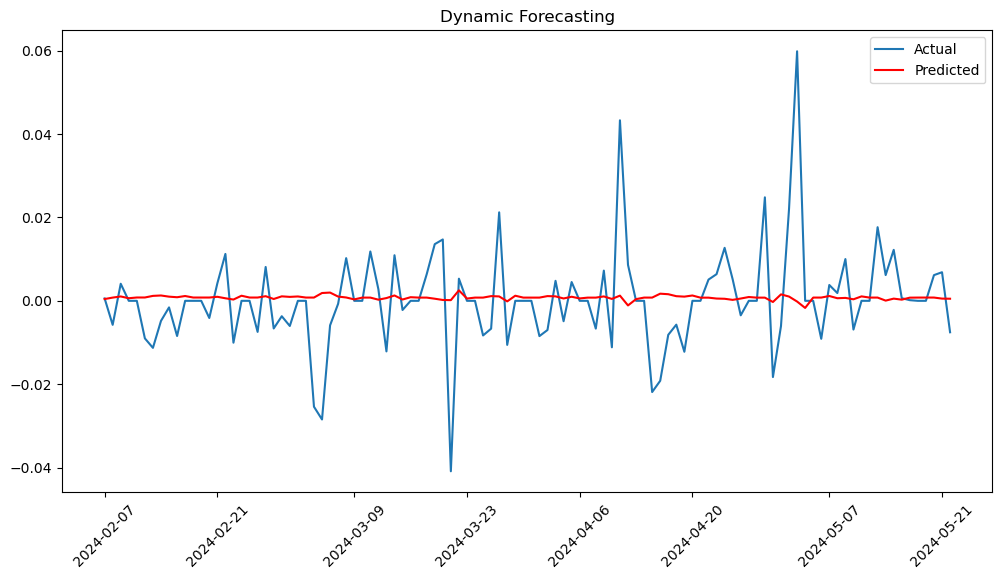

In [17]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Dynamic Forecasting')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
original_series = pd.Series([...])  # Your original series
last_value = original_series.iloc[-len(test)-1]  # Last known value before the test set

history = [x for x in train]  # Make the history as a list
predictions = []  # Make the predictions also as a list

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 0))  # Differencing with d=1 to handle the differencing of returns
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Finished {t+1} round, {len(test)-t-1} left')

# Convert predicted differenced returns back to the original returns
# Start with the last known value before the test set
predicted_returns = [last_value]
for i in range(len(predictions)):
    predicted_returns.append(predicted_returns[-1] + predictions[i])

# Remove the initial value to align with the predictions length
predicted_returns = predicted_returns[1:]

# Convert to pandas Series for easy handling
predicted_returns_series = pd.Series(predicted_returns)

print(predicted_returns_series)

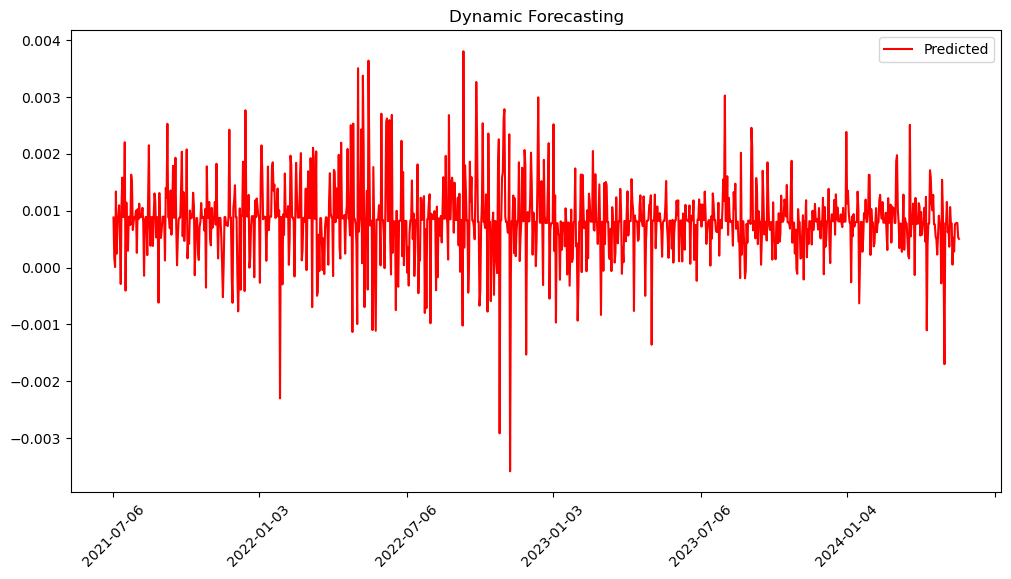

In [117]:
plt.figure(figsize=(12, 6))
# plt.plot(test_set.index, test_set['Return'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Dynamic Forecasting')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.show()

In [119]:
trend_prediction = pd.DataFrame(data = predictions, index = test.index, columns = ['prediction'])

In [120]:
trend_prediction['trend'] = np.where(trend_prediction['prediction']>0, 1, 0)
trend_prediction['trend'].value_counts()

trend
1    958
0     94
Name: count, dtype: int64

In [121]:
trend_prediction['real'] = test_set['Return']
trend_prediction['trend_real'] = np.where(trend_prediction['real']>0, 1, 0)


In [122]:
trend_prediction['trend_real'].value_counts(normalize= True)

trend_real
0    0.644487
1    0.355513
Name: proportion, dtype: float64

In [123]:
(trend_prediction['trend'] == trend_prediction['trend_real']).mean()

0.37832699619771865

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [141]:
def plot_model_performance(y_pred, y_test):

    # # This model should be a fitted model!!!!!
    # # Predict the labels
    # y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    columns = ['Accuracy', 'Precision', 'Recall', 'F1 score']
    data = [accuracy, precision, recall, f1]
    df_metrics = pd.DataFrame(data=data, index=columns, columns=['metrics'])

    # Plot metrics
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot for metrics
    axes[0].bar(df_metrics.index, df_metrics['metrics'], color='grey')
    axes[0].set_xlabel('Metrics', fontsize=14)
    axes[0].set_ylabel('Scores', fontsize=14)
    axes[0].set_title('Model Performance Metrics', fontsize=20, fontweight='bold')
    axes[0].set_ylim(0, 1)
    for bar in axes[0].patches:
        height = bar.get_height()
        axes[0].annotate(f'{height:.2f}', 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Confusion matrix
    dt_cf = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(dt_cf).plot(ax=axes[1], cmap='coolwarm')
    axes[1].set_title('Confusion Matrix', fontsize=20, fontweight='bold')

    # # ROC curve
    # y_proba = model.predict_proba(X_test)[:, 1]
    # fpr, tpr, _ = roc_curve(y_test, y_proba)
    # roc_auc = roc_auc_score(y_test, y_proba)
    # axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    # axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # axes[1, 0].set_xlim([0.0, 1.0])
    # axes[1, 0].set_ylim([0.0, 1.05])
    # axes[1, 0].set_xlabel('False Positive Rate', fontsize=14)
    # axes[1, 0].set_ylabel('True Positive Rate', fontsize=14)
    # axes[1, 0].set_title('ROC Curve', fontsize=20, fontweight='bold')
    # axes[1, 0].legend(loc="lower right")
    # axes[1, 0].grid()

    # # Hide the empty subplot
    # axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

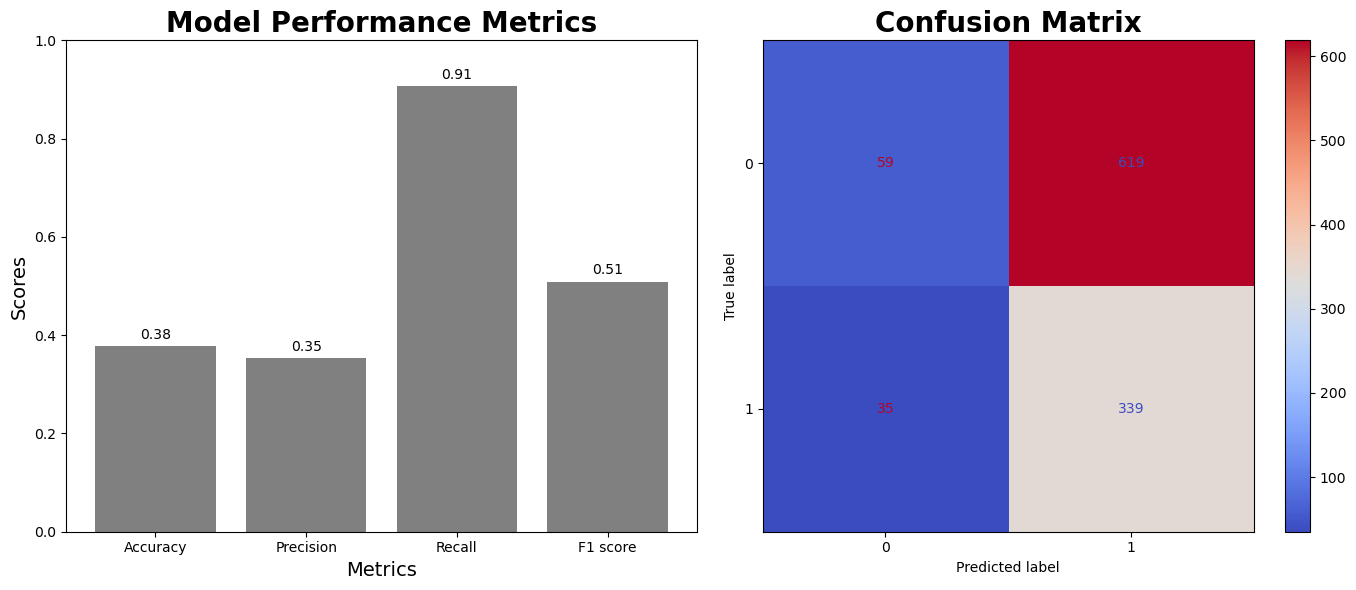

In [142]:
plot_model_performance(trend_prediction['trend'], trend_prediction['trend_real'])

## Time series - SARIMAX

In [143]:
apple

,Adj Close,Volume,Return,Return_tomo
2010-01-01,6.362937,352410800.0,0.000000,0.000000
2010-01-02,6.362937,352410800.0,0.000000,0.000000
2010-01-03,6.362937,352410800.0,0.000000,0.015565
2010-01-04,6.461977,493729600.0,0.015565,0.001729
2010-01-05,6.473148,601904800.0,0.001729,-0.015906
...,...,...,...,...
2024-05-18,189.869995,41282900.0,0.000000,0.000000
2024-05-19,189.869995,41282900.0,0.000000,0.006162
2024-05-20,191.039993,44361300.0,0.006162,0.006857
2024-05-21,192.350006,42309400.0,0.006857,-0.007538


In [144]:
from statsmodels.tsa.api import SARIMAX

In [165]:
# y = pd.Series([your_time_series_data])
# exog = pd.DataFrame([your_exogenous_variables])  # Optional, remove if not using exogenous variables

# Define the order of the model
p = 1  # AR order
d = 0  # Differencing order
q = 0  # MA order
P = 1  # Seasonal AR order
D = 0  # Seasonal differencing order
Q = 1  # Seasonal MA order
s = 8  # Seasonal period (e.g., 5 for daily data with weekly seasonality)

# Fit the SARIMAX model
model2 = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model2.fit()

# Summary of the model
print(results.summary())

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                      SARIMAX Results                                      
Dep. Variable:                              Return   No. Observations:                 4204
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 8)   Log Likelihood               11750.383
Date:                             Mon, 17 Jun 2024   AIC                         -23492.767
Time:                                     16:37:40   BIC                         -23467.391
Sample:                                 01-01-2010   HQIC                        -23483.794
                                      - 07-05-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0459      0.010     -4.494      0.000      -0.066      -0.026
ar.S.L8       -0.5831      

In [ ]:
history = [x for x in train] # Make the history as a list 
predictions1 = list()      # Make the prediction also as a list 

for t in range(len(test)):      # for every new point, we make a decision based on the available history 
    model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 1, 8))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'finish {t} round, {len(test_set)-t} left')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions1, label='Predicted', color='red')
plt.title('Dynamic Forecasting')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.legend()
plt.show()

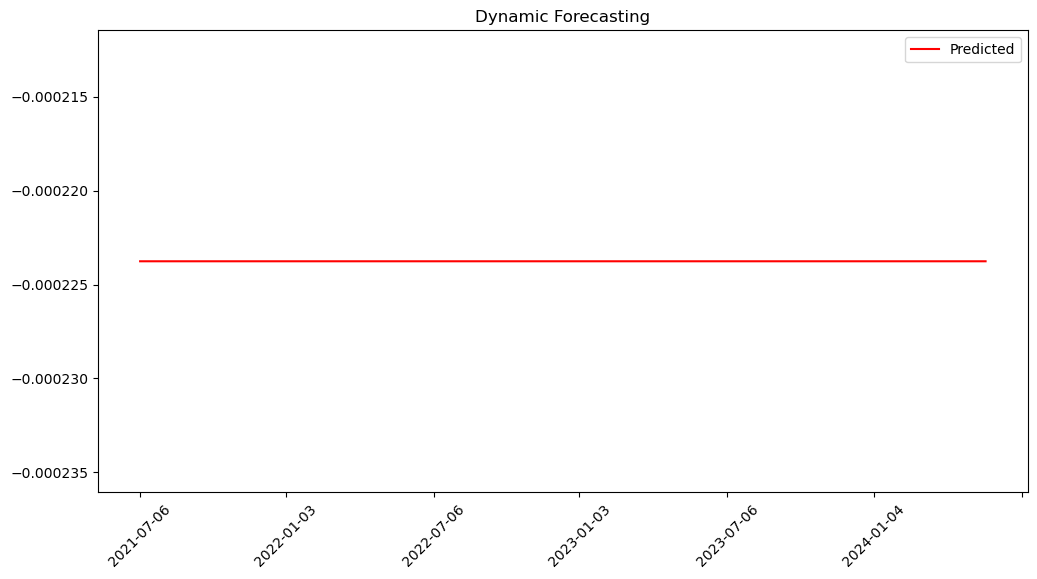

In [168]:
plt.figure(figsize=(12, 6))
# plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions1, label='Predicted', color='red')
plt.title('Dynamic Forecasting')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
plt.xticks(rotation=45)
plt.legend()
plt.show()